In [6]:
### Data Analysis and Manipulation 
import pandas as pa
import numpy as np
### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() ## this is for styling
### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [7]:
w = pa.read_csv('weatherHistory.csv')
w.rename(columns={'Loud Cover': 'Cloud Cover'}, inplace= True)

In [8]:
# cleaning data
# cleaning duplicates
w = w.drop_duplicates()
w = w[w['Temperature (C)']> -30] #removing the temp. less than -30
w = w[w['Temperature (C)']<30] #removing the temp. more than 30
w = w[w["Apparent Temperature (C)"]> -50] #removing the  apparent temp. less than -50
w = w[w["Apparent Temperature (C)"]<50] #removing the  apparent temp. more than 50
w = w[w["Pressure (millibars)"]>1000] #removing the Pressure less than 1000
w = w[w["Wind Bearing (degrees)"] >20] #removing the wind bearing less than 20
w = w[w["Cloud Cover"] == 0] #removing cloud clover not equal 0
w = w[w["Visibility (km)"] >= 0] #removing the visibility  less than 0
w = w[w["Humidity"] >= 0] #removing the HUmidity less than 0
w.sort_values(by=['Formatted Date'],ascending=True) # arranging the date
w=w.dropna() 
w

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96441,2016-09-09 12:00:00.000 +0200,Partly Cloudy,rain,28.866667,28.216667,0.37,13.9265,61.0,16.1000,0.0,1015.35,Partly cloudy starting in the morning.
96447,2016-09-09 18:00:00.000 +0200,Partly Cloudy,rain,28.838889,27.850000,0.32,12.2038,21.0,16.1000,0.0,1014.07,Partly cloudy starting in the morning.
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.


In [9]:
w.info() 
w1 = w.drop(columns=['Formatted Date', 'Summary','Precip Type','Daily Summary','Cloud Cover'])
w1

<class 'pandas.core.frame.DataFrame'>
Index: 81844 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            81844 non-null  object 
 1   Summary                   81844 non-null  object 
 2   Precip Type               81844 non-null  object 
 3   Temperature (C)           81844 non-null  float64
 4   Apparent Temperature (C)  81844 non-null  float64
 5   Humidity                  81844 non-null  float64
 6   Wind Speed (km/h)         81844 non-null  float64
 7   Wind Bearing (degrees)    81844 non-null  float64
 8   Visibility (km)           81844 non-null  float64
 9   Cloud Cover               81844 non-null  float64
 10  Pressure (millibars)      81844 non-null  float64
 11  Daily Summary             81844 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.1+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96441,28.866667,28.216667,0.37,13.9265,61.0,16.1000,1015.35
96447,28.838889,27.850000,0.32,12.2038,21.0,16.1000,1014.07
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66


In [10]:
X = w1.iloc[:,1:-1].values
y =w.iloc[:,3]


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([17.35019844,  5.7287151 ,  1.11530742, ...,  5.29430234,
        0.49620168, 22.44503299])

In [14]:
# Calculating the Coefficients
print(regressor.coef_)

[ 8.69114032e-01 -9.38714648e-01  8.18785507e-02 -5.21655301e-04
  1.70382554e-02]


In [15]:
# Calculating the Intercept
print(regressor.intercept_)

2.1781549380598832


In [16]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9899920829121491

+-------------------+----------------------+-------------+
| Algorithm         |   Mean Squared Error |   R^2 Score |
+===================+======================+=============+
| Linear Regression |           0.804186   |    0.990098 |
+-------------------+----------------------+-------------+
| Decision Tree     |           0.00656163 |    0.999919 |
+-------------------+----------------------+-------------+
| KNN               |           0.38453    |    0.995265 |
+-------------------+----------------------+-------------+
| Random Forest     |           0.00158531 |    0.99998  |
+-------------------+----------------------+-------------+
| Gradient Boosting |           0.0299699  |    0.999631 |
+-------------------+----------------------+-------------+
| AdaBoost          |           1.00036    |    0.987683 |
+-------------------+----------------------+-------------+


C:\Users\bodyt\AppData\Local\Temp\ipykernel_21952\2165305235.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set3', len(algorithms))


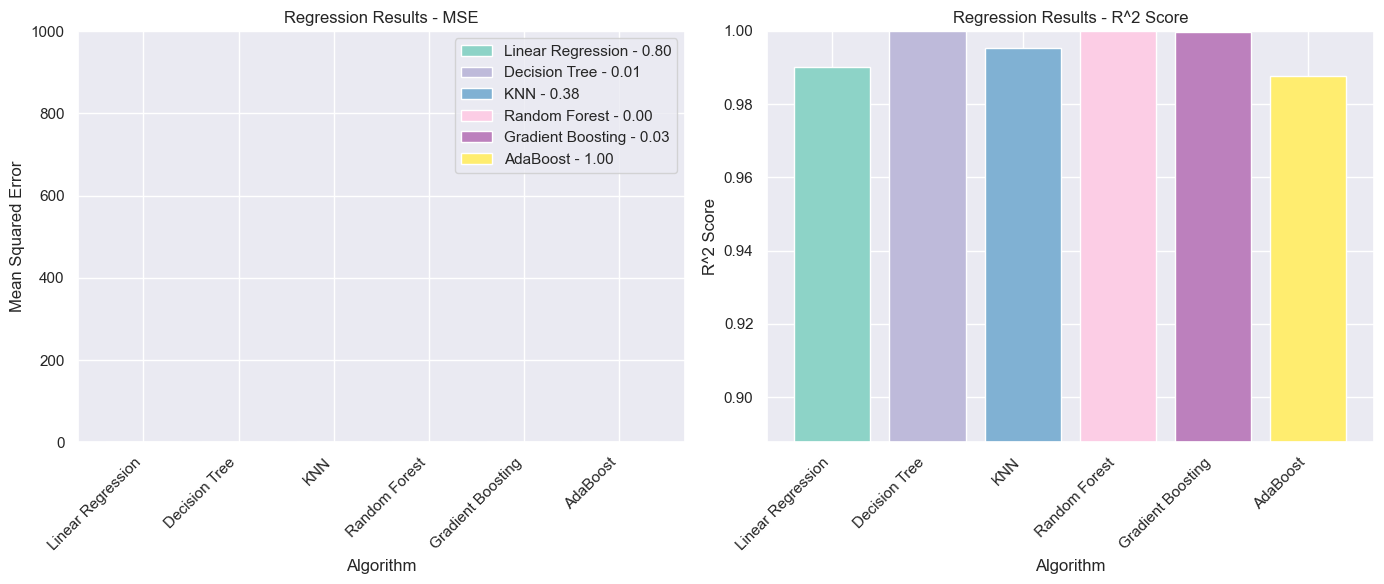

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
import io
def regress_and_evaluate(X, y, plot_title='Regression Results'):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate regressors
    regressors = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
    }

    # Train and evaluate each regressor
    results = []  # Store evaluation results here
    for name, reg in regressors.items():
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append([name, mse, r2])

    # Print results in a table
    headers = ["Algorithm", "Mean Squared Error", "R^2 Score"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

    # Plot results
    plot_results([result[0] for result in results], [result[1:] for result in results], plot_title)

def plot_results(algorithms, metrics, plot_title):
    # Plot MSE and R^2 Score
    mse = [metric[0] for metric in metrics]
    r2_scores = [metric[1] for metric in metrics]
    colors = plt.cm.get_cmap('Set3', len(algorithms))

    plt.figure(figsize=(14, 6))

    # Plot MSE
    plt.subplot(1, 2, 1)
    bars = plt.bar(algorithms, mse, color=colors(range(len(algorithms))))
    plt.xlabel('Algorithm')
    plt.ylabel('Mean Squared Error')
    plt.title(f'{plot_title} - MSE')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(mse) + 1000)
    legend_labels = [f'{name} - {mse_val:.2f}' for name, mse_val in zip(algorithms, mse)]
    plt.legend(bars, legend_labels, loc='upper right')

    # Plot R^2 Score
    plt.subplot(1, 2, 2)
    bars = plt.bar(algorithms, r2_scores, color=colors(range(len(algorithms))))
    plt.xlabel('Algorithm')
    plt.ylabel('R^2 Score')
    plt.title(f'{plot_title} - R^2 Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(min(r2_scores) - 0.1, 1)

    plt.tight_layout()
    plt.show()

# Example usage:
regress_and_evaluate(X, y)


<Axes: >

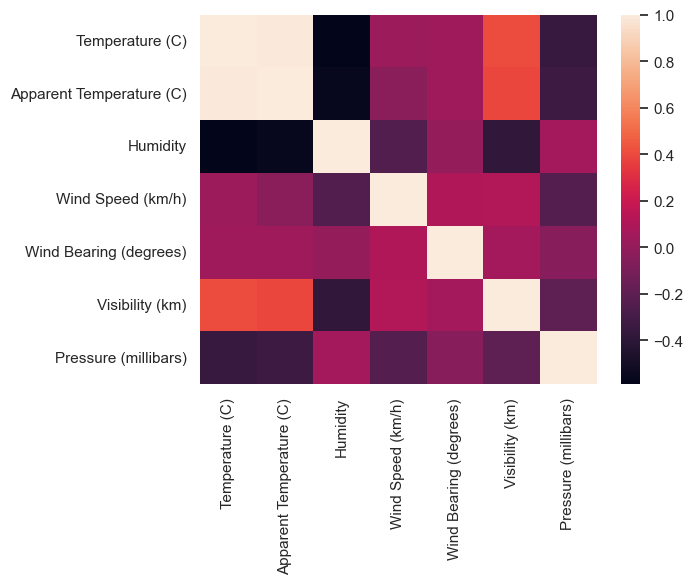

In [18]:
sns.heatmap(w1.corr())

In [19]:
scaler = StandardScaler()
w_std = scaler.fit_transform(w1)
w_std = pd.DataFrame(data = w_std,columns = w1.columns)

In [20]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(w_std)
    wcss.append(kmeans_pca.inertia_)

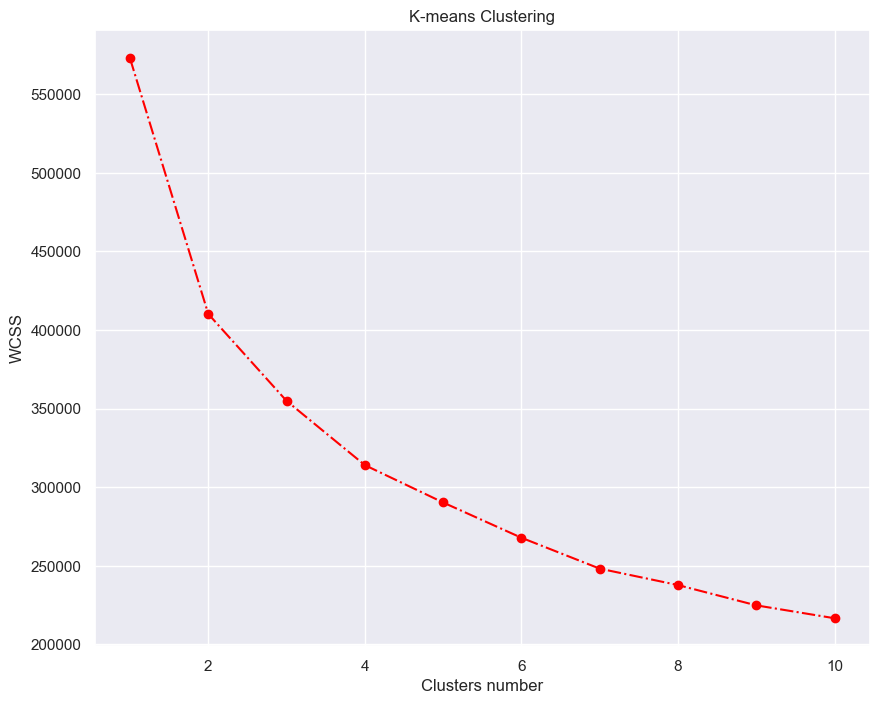

In [21]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Clusters number')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()


In [22]:
kmeans_model = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans_model.fit_predict(w1)


In [23]:
plt.scatter(w1[y_kmeans== 0,0],w1[y_kmeans == 0,1],s=80, c='red',label ="weather1")
plt.scatter(w1[y_kmeans== 1,0],w1[y_kmeans == 1,1],s=80, c='cyan',label ="weather2")
plt.scatter(w1[y_kmeans== 2,0],w1[y_kmeans == 2,1],s=80, c='green',label ="weather3")
plt.scatter(w1[y_kmeans== 3,0],w1[y_kmeans == 3,1],s=80, c='blue',label ="weather4")


InvalidIndexError: (array([False, False, False, ..., False, False, False]), 0)